# 直方图匹配

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## 打开两个图像

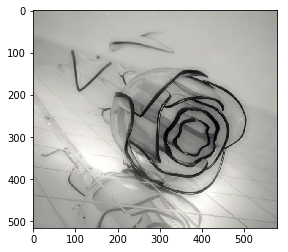

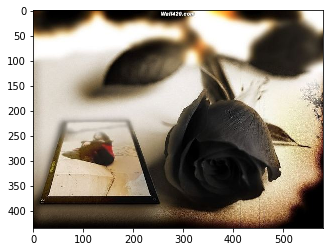

In [3]:
img1=Image.open("d:/myjpg/41.jpg")
plt.figure()
plt.imshow(img1)
img2=Image.open("d:/myjpg/43.jpg")
plt.figure()
plt.imshow(img2)

### 查看第一个图像的直方图

(516, 580, 3) 0 255


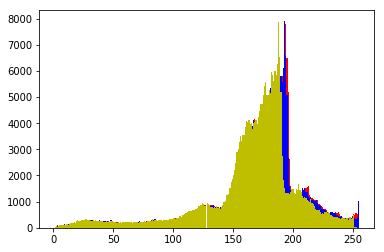

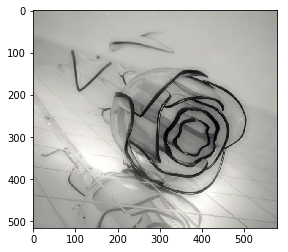

In [4]:
img_array1=np.array(img1)
print(img_array1.shape,img_array1.min(),img_array1.max())
c=('r','b','y')
plt.figure()
for i in range(img_array1.shape[2]):
    ar = img_array1[:,:,i].flatten() 
    plt.hist(ar,bins = 256,range=(1,255),color=c[i])

plt.figure()
plt.imshow(img_array1)

### 查看第二个图像的直方图

(435, 580, 3) 0 255


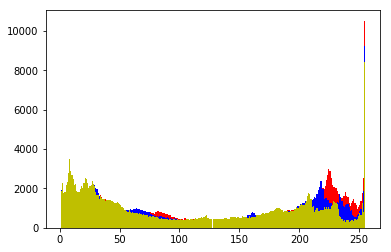

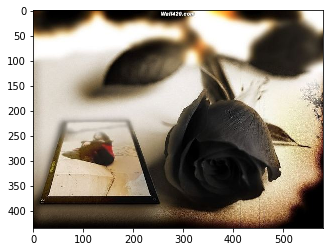

In [5]:
img_array2=np.array(img2)
print(img_array2.shape,img_array2.min(),img_array2.max())
c=('r','b','y')
plt.figure()
for i in range(img_array2.shape[2]):
    ar = img_array2[:,:,i].flatten() 
    plt.hist(ar,bins = 256,range=(1,255),color=c[i])

plt.figure()
plt.imshow(img_array2)

# 直方图匹配

### 先计算每个亮度的像元数
#### 图1中三个波段各自亮度像元数

In [6]:
#先计算每个亮度的像元数
hist1=[] #三个波段的直方图列表
for k in range(img_array1.shape[2]):
    band_hist={}
    hist1.append(band_hist) #一个波段的直方图
    for i in range(img_array1.shape[0]):
        for j in range(img_array1.shape[1]):
            if(img_array1[i,j,k] in hist1[k]):
                hist1[k][img_array1[i,j,k]]=hist1[k][img_array1[i,j,k]]+1
            else:
                hist1[k][img_array1[i,j,k]]=1
#print(hist1)       

#### 图2中各个亮度像元数

In [7]:
#先计算每个亮度的像元数
hist2=[] #三个波段的直方图列表
for k in range(img_array2.shape[2]):
    band_hist={}
    hist2.append(band_hist) #一个波段的直方图
    for i in range(img_array2.shape[0]):
        for j in range(img_array2.shape[1]):
            if(img_array2[i,j,k] in hist2[k]):
                hist2[k][img_array2[i,j,k]]=hist2[k][img_array2[i,j,k]]+1
            else:
                hist2[k][img_array2[i,j,k]]=1
#print(hist2) 

### 再计算每个亮度的概率
#### 图1中每个亮度的概率

In [8]:
#求元素个数
num=[]
for k in range(img_array1.shape[2]):
    mask=img_array1[:,:,k]>=0
    num.append(mask.sum())
    print("L0 of data is:", num[k])
    #del hist[0] #删除0值
    for key in hist1[k].keys():
        hist1[k][key]=hist1[k][key]/num[k]
    #print(hist1[k]) 

L0 of data is: 299280
L0 of data is: 299280
L0 of data is: 299280


#### 图2中每个亮度的概率

In [9]:
#求元素个数
num=[]
for k in range(img_array2.shape[2]):
    mask=img_array2[:,:,k]>=0
    num.append(mask.sum())
    print("L0 of data is:", num[k])
    #del hist[0] #删除0值
    for key in hist2[k].keys():
        hist2[k][key]=hist2[k][key]/num[k]
    #print(hist2[k]) 

L0 of data is: 252300
L0 of data is: 252300
L0 of data is: 252300


### 排序后计算累计概率
#### 图1排序后累计概率

In [10]:
sort_hist=[]
for k in range(img_array1.shape[2]):
    sort_hist.append(sorted(hist1[k].items()))
    #print(sort_hist[k])
    sum_p=0 #累计概率
    for i in sort_hist[k]:
        sum_p=sum_p+i[1]
        hist1[k][i[0]]=sum_p

In [11]:
sort_hist1=[]
for k in range(img_array1.shape[2]):
    sort_hist1.append(sorted(hist1[k].items()))
#print(sort_hist1)

#### 图2排序后累计概率

In [12]:
sort_hist=[]
for k in range(img_array2.shape[2]):
    sort_hist.append(sorted(hist2[k].items()))
    #print(sort_hist[k])
    sum_p=0 #累计概率
    for i in sort_hist[k]:
        sum_p=sum_p+i[1]
        hist2[k][i[0]]=sum_p

In [13]:
sort_hist2=[]
for k in range(img_array2.shape[2]):
    sort_hist2.append(sorted(hist2[k].items()))
#print(sort_hist2)

### 累计概率匹配（最近邻近，找到两个图像亮度映射关系）

In [14]:
sort_hist=[]
for k in range(img_array1.shape[2]):   
    band_hist={}
    sort_hist.append(band_hist)
    p=0 #j的起始查找位置，找过的就不用再找了
    for i in range(len(sort_hist1[k])): #hist1里的每个累计概率都要查找到匹配的对应值
        #每次比较的差值，判断离谁更近
        old=1 #上一次的差值
        new=0 #当前的差值
        flag=0 #是否找到并映射
        for j in range(p,len(sort_hist2[k])): #在hist2中逐个查找对应值，起始位置随着查找过程改变
            new=abs(sort_hist1[k][i][1]-sort_hist2[k][j][1])
            if(new>old): #找到最小差异，则做映射              
                sort_hist[k][sort_hist1[k][i][0]]=sort_hist2[k][j-1][0]
                p=j-1 #从上次找到的位置重新开始找，因为有可能重复映射到同一个值
                flag=1
                break;
            else:
                old=new
        if(flag==0): #没有找到最小，则赋值最后一个亮度
                sort_hist[k][sort_hist1[k][i][0]]=sort_hist2[k][j][0]
#print(sort_hist)

In [15]:
print(len(sort_hist[0].keys()))
print(len(sort_hist1[0]))

256
256


### 用亮度映射关系重新设置原始图像像元亮度

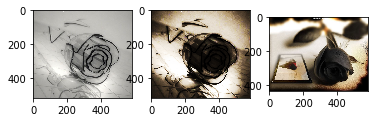

In [16]:
height=img_array1.shape[0]
width=img_array1.shape[1]
band=img_array1.shape[2]
img_new_array=np.zeros((height,width,band),dtype=int)
for k in range(band):
    for i in range(height):
        for j in range(width):
            #print(sort_hist[k][img_array1[i,j,k]])
            img_new_array[i,j,k]=sort_hist[k][img_array1[i,j,k]]
            
plt.subplot(1,3,1)
plt.imshow(img_array1)
plt.subplot(1,3,2)
#plt.figure()
plt.imshow(img_new_array)
plt.subplot(1,3,3)
#plt.figure()
plt.imshow(img_array2)

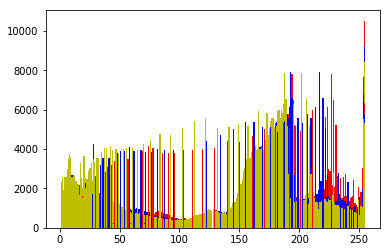

In [17]:
c=('r','b','y')
#plt.subplot(1,3,1)
for i in range(img_array2.shape[2]):
    ar = img_array2[:,:,i].flatten() 
    plt.hist(ar,bins = 256,range=(1,255),color=c[i])
#plt.subplot(1,3,2)
for i in range(img_array1.shape[2]):
    ar = img_array1[:,:,i].flatten() 
    plt.hist(ar,bins = 256,range=(1,255),color=c[i])
#plt.subplot(1,3,3)

for i in range(img_array1.shape[2]):
    ar = img_new_array[:,:,i].flatten() 
    plt.hist(ar,bins = 256,range=(1,255),color=c[i])